# Intermediate Data Visualization with Seaborn

## Chapter 4 - Creating Plots on Data Aware Grids


### Using FacetGrid, Factorplot and LMplot

One of Seaborn's most powerful capability is the ability to combine multiple smaller plots into a larger visualization. The concept of small multiples is useful for analyzing data with many variables. These are referred to as a trellis or lattice plot, multiple datapoints in smaller plots, side by side, using the same scales and axes. This concept is called faceting in data science. In order for Seaborn to create these plots, the data must be in a tidy data format: one observation per row of data. 

Using FacetGrid is a two step process of defining the facets and then mapping the plot type. 

#### FacetGrid Categorical Example

This example is mapping a data aware grid onto a boxplot. The first step is setting up a FacetGrid with the col = parameter set to the highest degree that the college awards against the college data DataFrame. The next step is to plot the tuition values and, in this case, define the order that the degrees should be displayed in. 

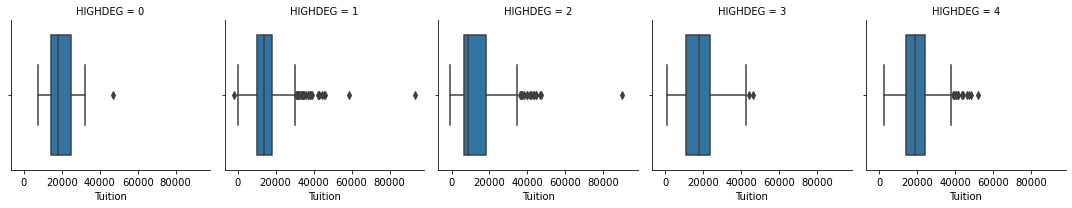

In [1]:
import os
os.chdir('c:\\datacamp\\data\\')

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('2018_college_data.csv')

g = sns.FacetGrid(df, col='HIGHDEG')
g.map(sns.boxplot,'Tuition', order=['1', '2', '3', '4'])
plt.show()

#### catplot()

The factorplot() function has recently been renamed the catplot() function and is shortcut to creating FacetGrids, eliminating the two step process. 

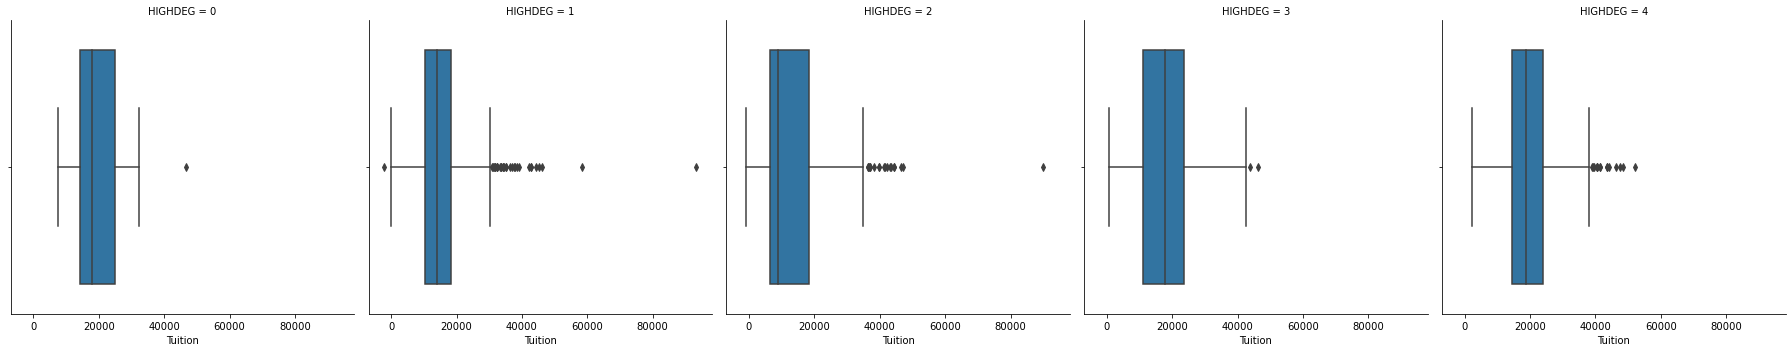

In [3]:
sns.catplot(x='Tuition', data=df, col='HIGHDEG', kind = 'box')
plt.show()

#### FacetGrid for Regression Plots

FacetGrid can be used for scatter and regression plots as well.

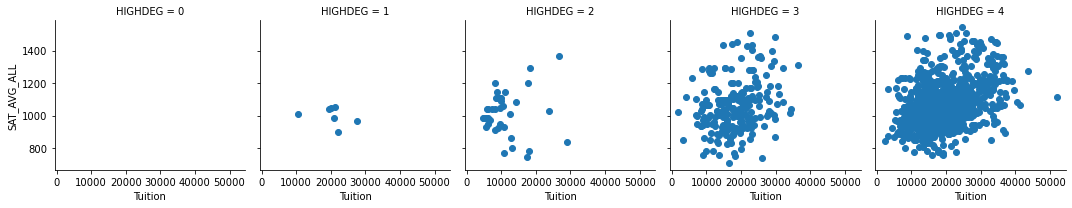

In [4]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')
plt.show()

### lmplot

The lmplot() function is similar to the catplot() function, it provides a shortcut for plotting regression and scatter plots in a FacetGrid. The fit_reg = parameter set to False disables the regression lines. 

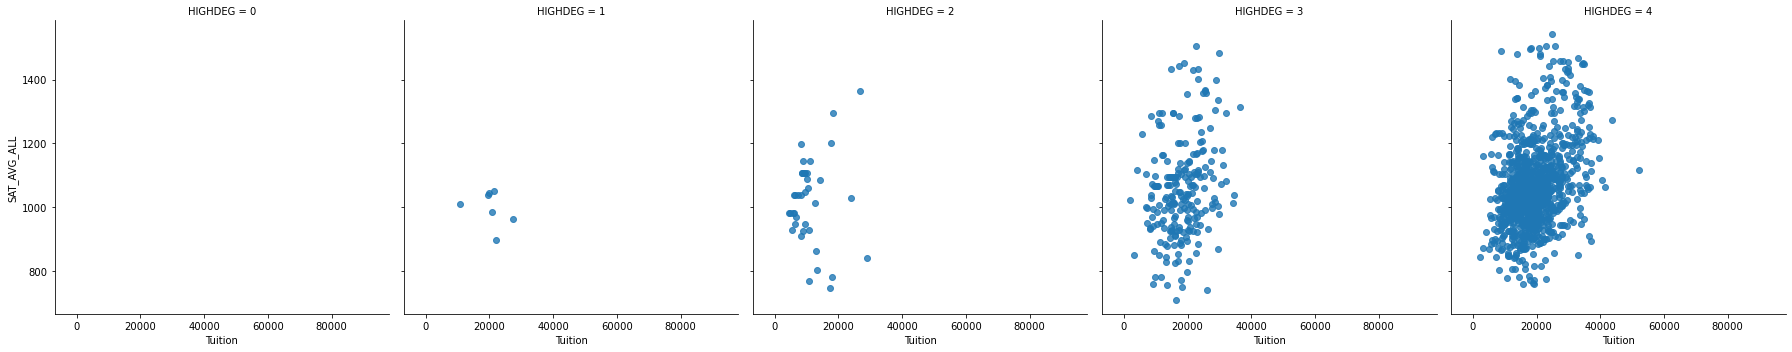

In [5]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', col='HIGHDEG', fit_reg=False)
plt.show()

### Exercise 1

#### Building a FacetGrid
Seaborn's FacetGrid is the foundation for building data-aware grids. A data-aware grid allows you to create a series of small plots that can be useful for understanding complex data relationships.

For these exercises, we will continue to look at the College Scorecard Data from the US Department of Education. This rich dataset has many interesting data elements that we can plot with Seaborn.

When building a FacetGrid, there are two steps:
> Create a FacetGrid object with columns, rows, or hue.<br>
> Map individual plots to the grid.<br>

__Instructions:__
* Create a FacetGrid that shows a point plot of the Average SAT scores SAT_AVG_ALL.
* Use row_order to control the display order of the degree types.

C:\Users\janin\miniconda3\envs\datacamp\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


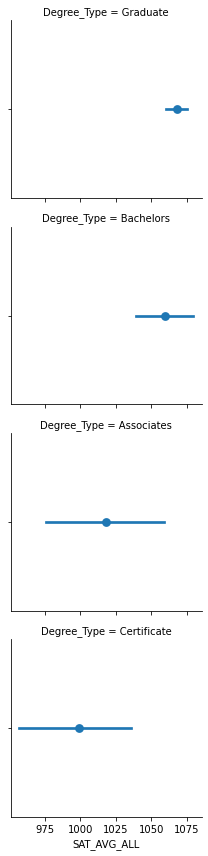

<Figure size 432x288 with 0 Axes>

In [6]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

#### Using a factorplot
In many cases, Seaborn's factorplot() can be a simpler way to create a FacetGrid. Instead of creating a grid and mapping the plot, we can use the factorplot() to create a plot with one line of code.

For this exercise, we will recreate one of the plots from the previous exercise using factorplot() and show how to create a boxplot on a data-aware grid.

__Instructions:__
* Create a factorplot() that contains a boxplot (box) of Tuition values varying by Degree_Type across rows.
* Create a factorplot() of SAT Averages (SAT_AVG_ALL) facetted across Degree_Type that shows a pointplot (point).
* Use row_order to order the degrees from highest to lowest level.

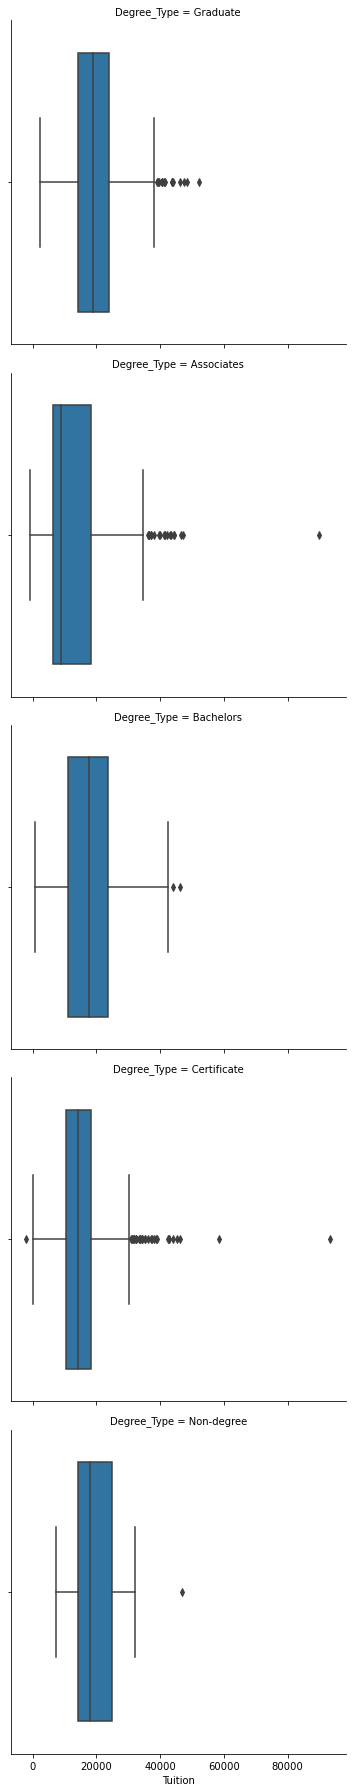

<Figure size 432x288 with 0 Axes>

In [8]:
# Create a category plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()
plt.clf()

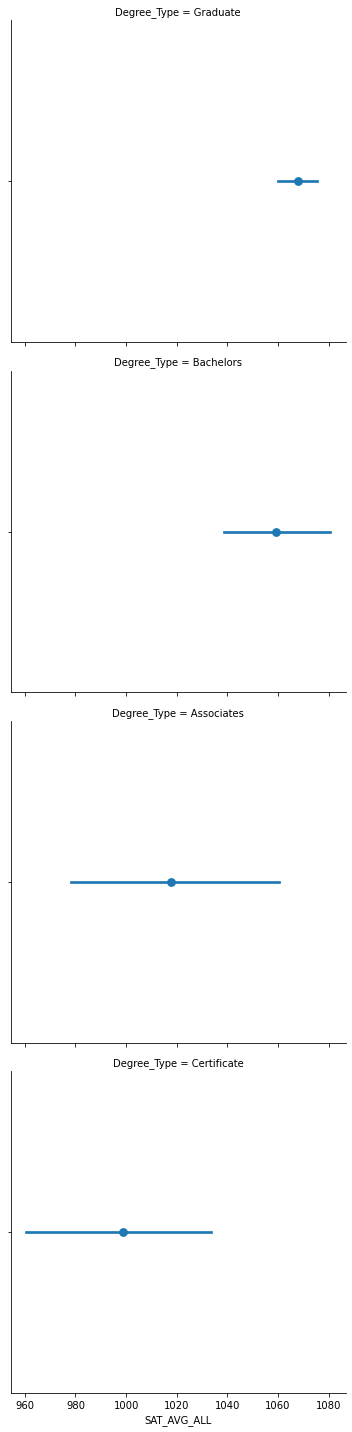

<Figure size 432x288 with 0 Axes>

In [2]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

#### Using a lmplot
The lmplot is used to plot scatter plots with regression lines on FacetGrid objects. The API is similar to factorplot with the difference that the default behavior of lmplot is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate population (UG) and compare it to the percentage of students receiving Pell Grants (PCTPELL).

For the second lmplot exercise, we can look at the relationships between Average SAT scores and Tuition across the different degree types and public vs. non-profit schools.

__Instructions:__
* Create a FacetGrid() with "Degree_Type" columns and scatter plot of "UG" and "PCTPELL".
* Create a lmplot() using the same values from the FacetGrid()
* Create a facetted lmplot() comparing "SATAVGALL" to "Tuition" with columns varying by "Ownership" and rows by "Degree_Type".
* In the lmplot() add a hue for Women Only Universities.

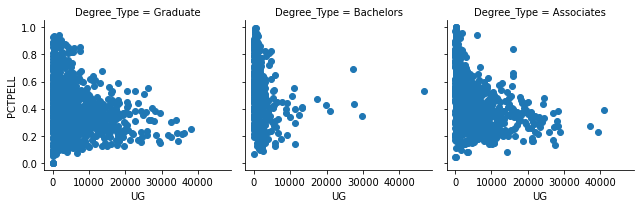

<Figure size 432x288 with 0 Axes>

In [11]:
degree_ord=['Graduate', 'Bachelors', 'Associates']

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

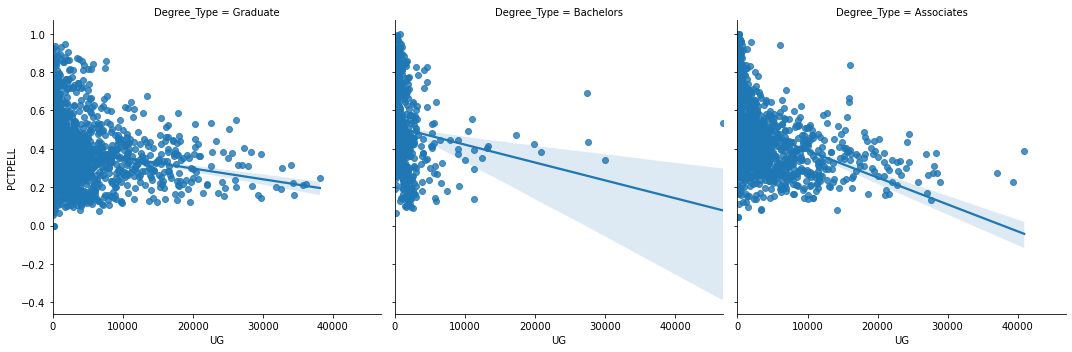

<Figure size 432x288 with 0 Axes>

In [12]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()
plt.clf()

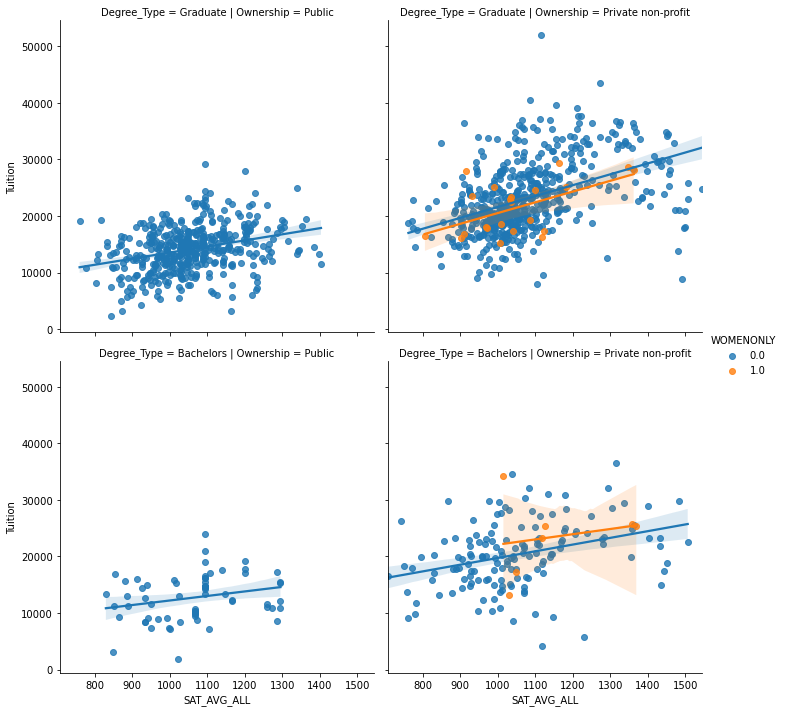

<Figure size 432x288 with 0 Axes>

In [14]:
inst_ord = ['Public', 'Private non-profit']
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()
plt.clf()

### Using PairGrid and Pairplot

Like the FacetGrid plots, the PairGrid and pairplot allow visualization of interactions across different columns. The difference with these plots is that only the columns of data that need to be compared are included.

#### Pairwise Relationships

The PairGrid plot shows the pairwise relationship between 2 data elements. The process for creating a PairGrid is similar to creating a FacetGrid in that first a grid is created and then it is mapped to a plot type. 
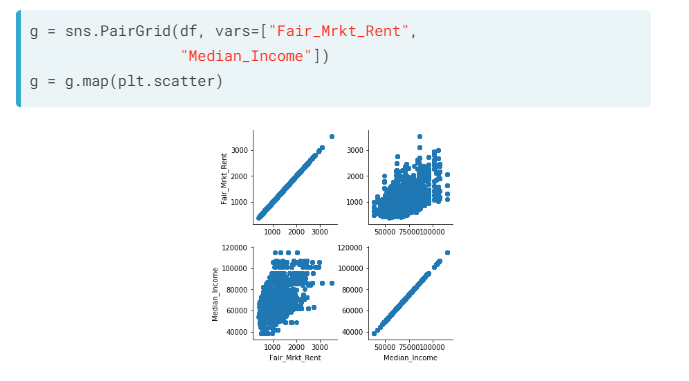

#### Customizing the PairGrid Diagonals

PairGrids supports defining the types of plots that are displayed on the diagonals using the .map_diag() and .map_offdiag() functions. 
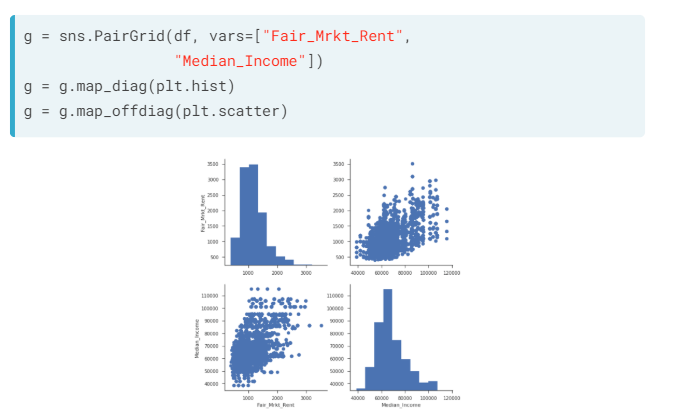


#### Pairplot 

Pairplot, like catplot, simplifies the PairGrid from two steps to one and plots the regression line automatically.
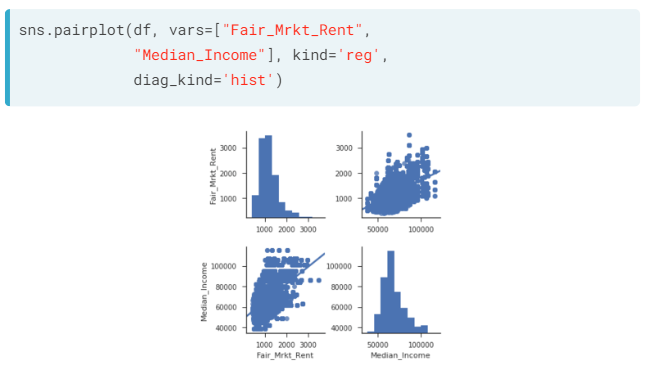

#### Customing Pairplots
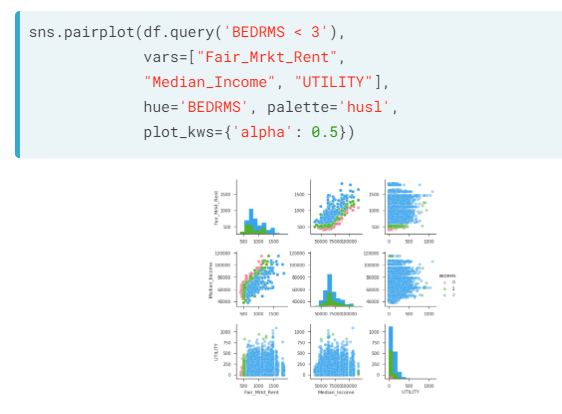

### Exercise 2

#### Building a PairGrid
When exploring a dataset, one of the earliest tasks is exploring the relationship between pairs of variables. This step is normally a precursor to additional investigation.

Seaborn supports this pair-wise analysis using the PairGrid. In this exercise, we will look at the Car Insurance Premium data we analyzed in Chapter 1. All data is available in the df variable.

__Instructions:__
* Compare "fatal_collisions" to "premiums" by using a scatter plot mapped to a PairGrid().
* Create another PairGrid but plot a histogram on the diagonal and scatter plot on the off diagonal.

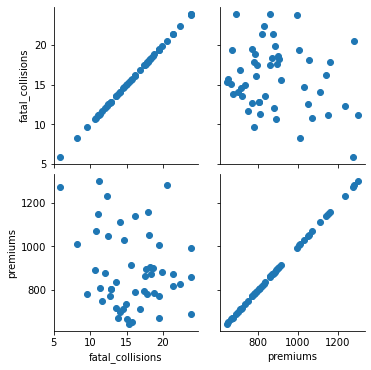

<Figure size 432x288 with 0 Axes>

In [16]:
# Create DataFrame used in this exercise
df = pd.read_csv('insurance_premiums.csv')

# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

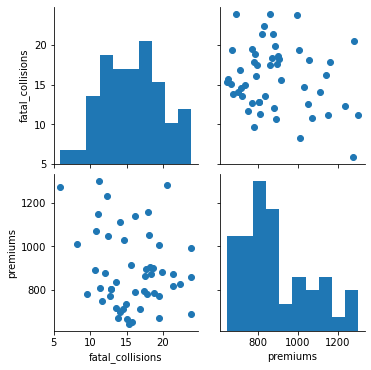

<Figure size 432x288 with 0 Axes>

In [17]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

#### Using a pairplot
The pairplot() function is generally a more convenient way to look at pairwise relationships. In this exercise, we will create the same results as the PairGrid using less code. Then, we will explore some additional functionality of the pairplot(). We will also use a different palette and adjust the transparency of the diagonal plots using the alpha parameter.

__Instructions:__
* Recreate the pairwise plot from the previous exercise using pairplot().
* Create another pairplot using the "Region" to color code the results.
* Use the RdBu palette to change the colors of the plot.

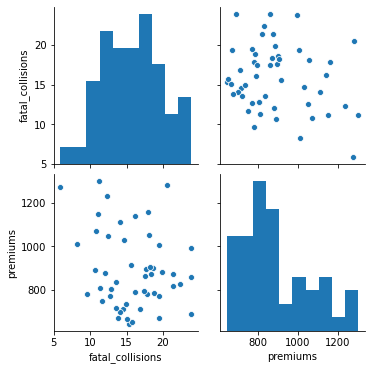

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()
plt.clf()

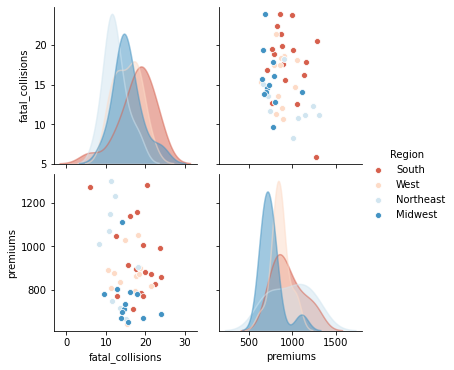

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

#### Additional pairplots
This exercise will go through a couple of more examples of how the pairplot() can be customized for quickly analyzing data and determining areas of interest that might be worthy of additional analysis.

One area of customization that is useful is to explicitly define the x_vars and y_vars that you wish to examine. Instead of examining all pairwise relationships, this capability allows you to look only at the specific interactions that may be of interest.

We have already looked at using kind to control the types of plots. We can also use diag_kind to control the types of plots shown on the diagonals. In the final example, we will include a regression and kde plot in the pairplot.

__Instructions:__
* Create a pair plot that examines fatal_collisions_speeding and fatal_collisions_alc on the x axis and premiums and insurance_losses on the y axis.
* Use the husl palette and color code the scatter plot by Region.
* Build a pairplot() with kde plots along the diagonals. Include the insurance_losses and premiums as the variables.
* Use a reg plot for the the non-diagonal plots.
* Use the BrBG palette for the final plot.

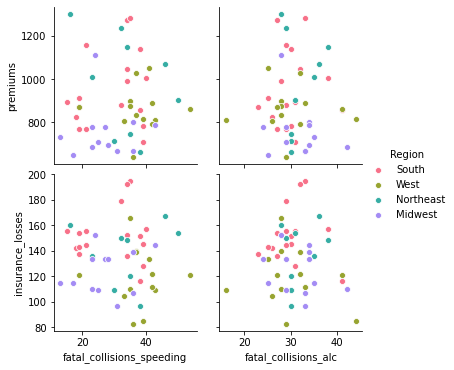

<Figure size 432x288 with 0 Axes>

In [20]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

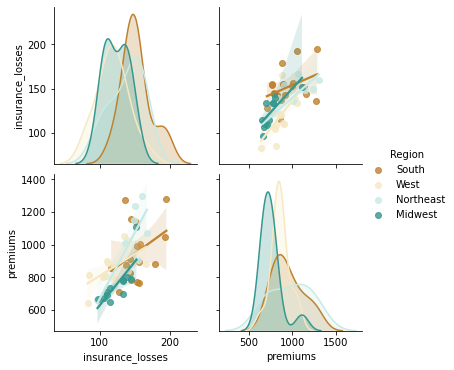

<Figure size 432x288 with 0 Axes>

In [21]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

### Using JointGrid and Jointplot

JointGrids allow for the comparison of the distribution of data between two variables. JointPlots use scatterplots, regression lines, histograms, distribution plots and kernel density estimates to give insight into the data.

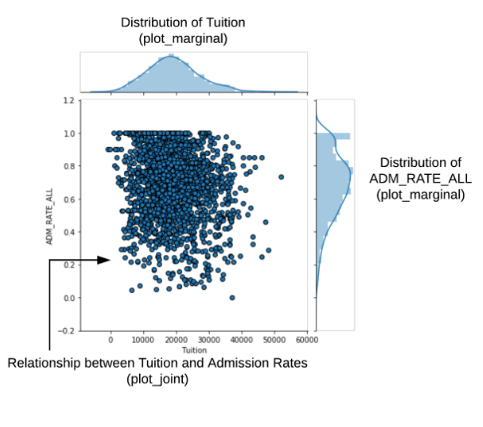

#### Basic JointGrid Creation

JointGrids takes a few points of information creates an insightful visualization of the data. Inputs to the JointGrid are the x and y variables and the center of the plot contains a scatterplot of these two variables. The plots along the x and y axes show the distribution of the data for each variable. This plot can be configured by specifying the type of joint plots as well as the marginal plots.

Like the other grids, to create a JointGrid, first the grid is defined and then the points are mapped to the grid. In this case, x and y are mapped to the Tuition and Admission Rate variables respectively and then Seaborn's regplot and distplot are mapped to the grid.

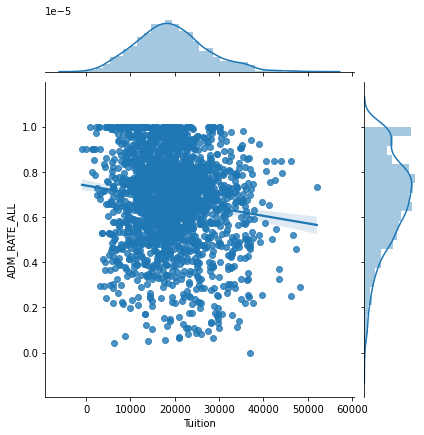

In [4]:
df = pd.read_csv('2018_college_data.csv')
g = sns.JointGrid(data=df, x="Tuition", y='ADM_RATE_ALL')
g.plot(sns.regplot, sns.distplot)

#### Advanced JointGrid Options

In this example below, advanced configuration options are used. The .plot_joint() function specifies that a KDE plot should be used in the center. The KDI plots for the margins are defined in the .plot_marginals() function. The .annotate() function is also used to define additional information about the relationship of the variables. The Python SciPy stats library contains a function that calculates the Pearson correlation value. Seaborn takes care of applying this function and labeling the graph with this value.

C:\Users\janin\miniconda3\envs\datacamp\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


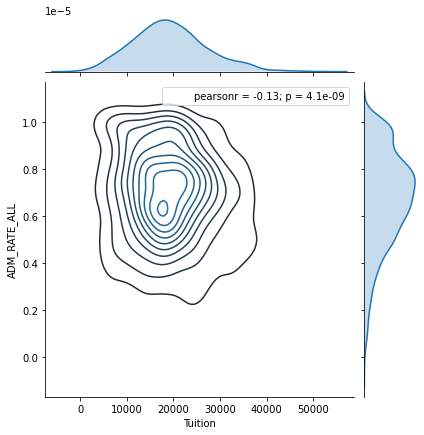

In [7]:
from scipy import stats
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade = True)
g = g.annotate(stats.pearsonr)

### jointplot()

The .jointplot() function is easier to use, but provides fewer customization capabilities. In the example below the kind = keyword is set to hex to call for a hexplot to be used. This is a simplier approach to creating a JointGrid. 

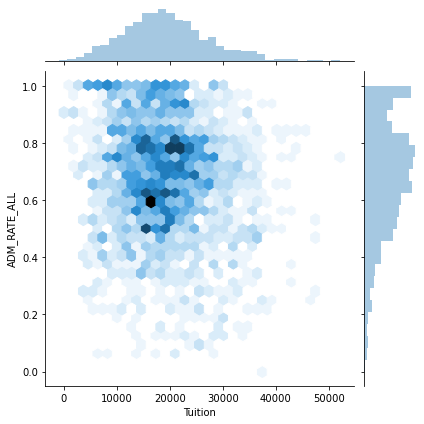

In [8]:
sns.jointplot(data=df, x='Tuition', y = 'ADM_RATE_ALL', kind='hex')

#### Customizing a jointplot

The .jointplot() function supports simply creation of scatter, hex, residual, regression and kde plots. It can also support adding overlay plots. This example below shows a fairly common paradigm for analyzing data with Seaborn. the limits for the x axis are set with the xlim = keyword argument. In addition, keywords are passed to the marginal plot to control the structure of the histogram. In this case the grid will show the data for public universities with an undergraduate enrollment of lessthan 2,500 students. And finally, using the .plot_joint() function, a KDE plot is overlayed on the scatter plot. This type of plot is useful for seeing where the x and y variables (Tuition and Admissions) have natural groupings. 

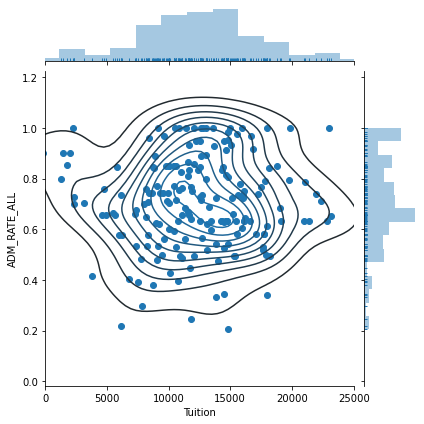

In [16]:
sns.jointplot(data = df.query('UG < 2500 & Ownership=="Public"'), x='Tuition', y='ADM_RATE_ALL', xlim=(0, 25000), 
            marginal_kws=dict(bins=15,rug=True)).plot_joint(sns.kdeplot)

### Exercise 3

#### Building a JointGrid and jointplot
Seaborn's JointGrid combines univariate plots such as histograms, rug plots and kde plots with bivariate plots such as scatter and regression plots. The process for creating these plots should be familiar to you now. These plots also demonstrate how Seaborn provides convenient functions to combine multiple plots together.

For these exercises, we will use the bike share data that we reviewed earlier. In this exercise, we will look at the relationship between humidity levels and total rentals to see if there is an interesting relationship we might want to explore later.

__Instructions:__
* Use Seaborn's "whitegrid" style for these plots.
* Create a JointGrid() with "hum" on the x-axis and "total_rentals" on the y.
* Plot a regplot() and distplot() on the margins.
* Re-create the plot using a jointplot().

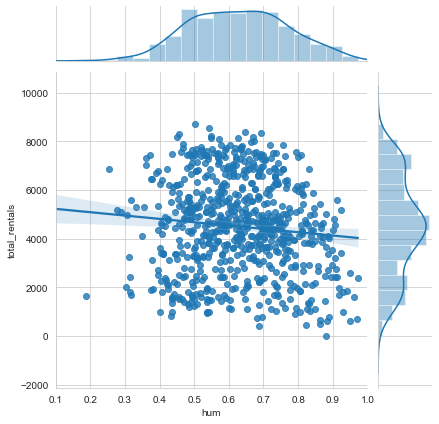

<Figure size 432x288 with 0 Axes>

In [17]:
# Creating the DF used for these exercises
df = pd.read_csv('bike_share.csv')

# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

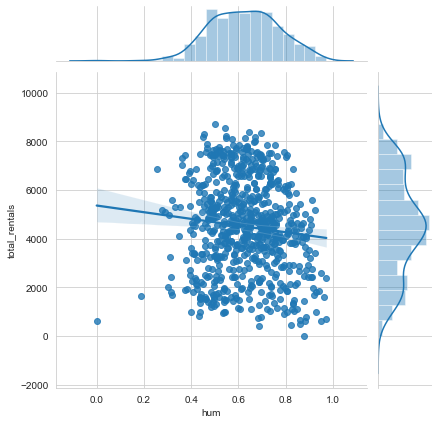

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()

#### Jointplots and regression
Since the previous plot does not show a relationship between humidity and rental amounts, we can look at another variable that we reviewed earlier. Specifically, the relationship between temp and total_rentals.

__Instructions:__
* Create a jointplot with a 2nd order polynomial regression plot comparing temp and total_rentals.
* Use a residual plot to check the appropriateness of the model.

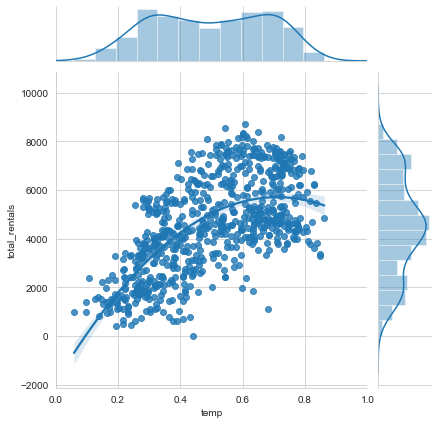

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

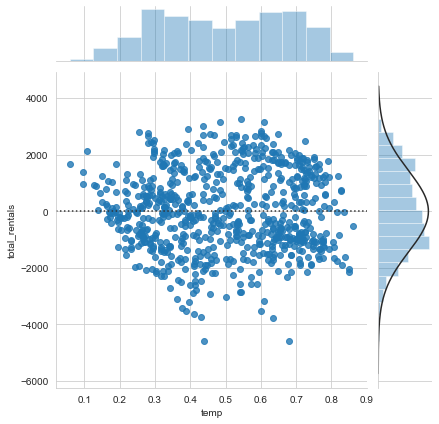

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='residuals',
        data=df,
        order=2)

plt.show()
plt.clf()

Based on the residual plot and the pearson r value, there is a positive relationship between temperature and total_rentals.

#### Complex jointplots
The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

__Instructions:__
* Create a jointplot with a scatter plot comparing temp and casual riders.
* Overlay a kdeplot on top of the scatter plot.
* Build a similar plot for registered users.

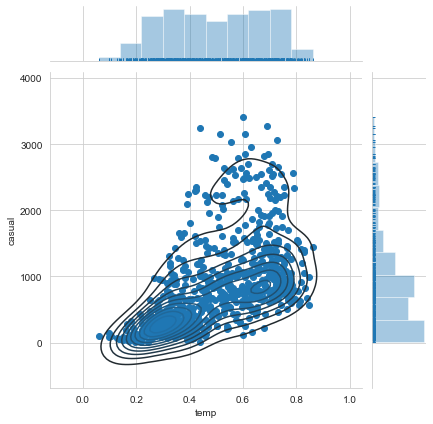

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

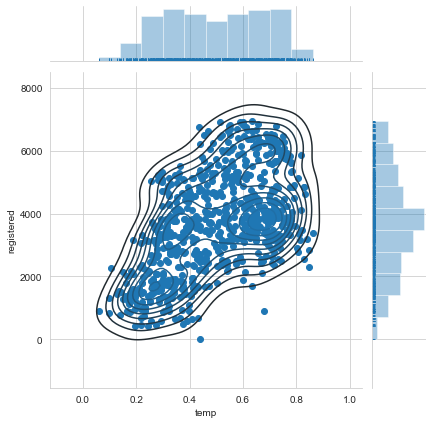

<Figure size 432x288 with 0 Axes>

In [22]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

### Selecting Seaborn Plots

The power of Seaborn is the way the different plots build on each other. For example, a KDE plot can be used on its own or it can be generated from a distplot. In addition the pairgrid and jointgrid plots build on top of the regression and distribution plots. 

#### Univariate Distribution Analysis

One of the first steps in analyzing numerical data is looking at it's distribution. Seaborn's distplot combines many of the feature of the rugplot() and kdeplot() and matplotlib's hist() into a single function. 
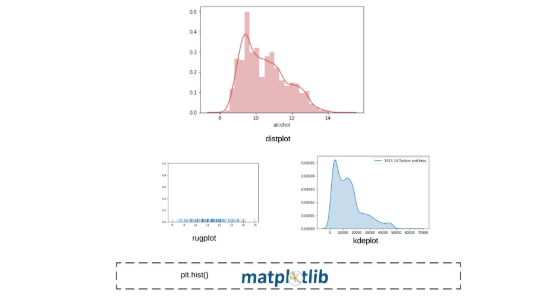

The distplot() is the best place to start when trying to do distribution analysis with Seaborn. 

#### Regression Analysis

A regression plot shows the relationship between two variables. Matplotlib's scatter plot is a very simple way to compare variables on the x and y axis. The lmplot() combines many of these features with an underlying regplot and residplot in addition to the ability to plot the data on a FacetGrid. In many instances, lmplot is the best function to use for determining linear relationships between data. 

#### Categorical Plots

In most scenarios it makes sense to use one of the categorical plots, such as the box plot or violin plot, to examine the distribution of the variables, then follow up with the statistical estimation plots such as the point, bar or count plot. If you need to facet the data across rows or columns, use a facetplot. 

#### Pairplot() and joinplot()

These plots are going to be most useful after some preliminary analysis of regressions or distributions. Once you are familar with the data, the pairplot() and joinplot() can be very use functions for understanding how two or more variables interact with each other. 